In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
%matplotlib inline

# Configure matplotlib for better visuals with ggplot style
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots for better visibility

# Load the data from a CSV file
df = pd.read_csv('/home/rafael/Documents/Python/PythonCorrelation/movies.csv')

In [2]:
# Display the first few rows of the DataFrame to understand its structure
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# Checking for missing data across all columns to decide on data preprocessing needs
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - missing percentage: {pct_missing:.2%}")
    print(df[col].isnull().value_counts(), "\n")

name - missing percentage: 0.00%
name
False    7668
Name: count, dtype: int64 

rating - missing percentage: 1.00%
rating
False    7591
True       77
Name: count, dtype: int64 

genre - missing percentage: 0.00%
genre
False    7668
Name: count, dtype: int64 

year - missing percentage: 0.00%
year
False    7668
Name: count, dtype: int64 

released - missing percentage: 0.03%
released
False    7666
True        2
Name: count, dtype: int64 

score - missing percentage: 0.04%
score
False    7665
True        3
Name: count, dtype: int64 

votes - missing percentage: 0.04%
votes
False    7665
True        3
Name: count, dtype: int64 

director - missing percentage: 0.00%
director
False    7668
Name: count, dtype: int64 

writer - missing percentage: 0.04%
writer
False    7665
True        3
Name: count, dtype: int64 

star - missing percentage: 0.01%
star
False    7667
True        1
Name: count, dtype: int64 

country - missing percentage: 0.04%
country
False    7665
True        3
Name: count, d

In [4]:
# Print the data types of all columns to ensure they are appropriate
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Remove rows with any missing data to simplify further analysis
df = df.dropna()

In [6]:
# Adjust data types for specific columns to ensure consistency in data processing
df.loc[:, 'votes'] = df['votes'].astype('int64')
df.loc[:, 'budget'] = df['budget'].astype('int64')
df.loc[:, 'gross'] = df['gross'].astype('int64')
df.loc[:, 'runtime'] = df['runtime'].astype('int64')

In [7]:
# Extract year from 'released' column and correct inconsistencies if any
df.loc[:, 'yearcorrect'] = pd.to_numeric(df['released'].str.extract(pat = '([0-9]{4})')[0], errors='coerce').fillna(0).astype('int64')

In [8]:
# Sort the DataFrame by 'gross' earnings in descending order for better analysis perspective
sorted_df = df.sort_values(by=['gross'], ascending=False)

# Display the sorted DataFrame as an HTML table in a scrollable div for better readability in Jupyter
from IPython.display import HTML, display
html = sorted_df.to_html()
display(HTML(f'<div style="max-height: 600px; overflow-y: auto; margin: 10px;">{html}</div>'))

In [9]:
# Remove duplicate entries based on all columns to ensure data integrity
df = df.drop_duplicates()

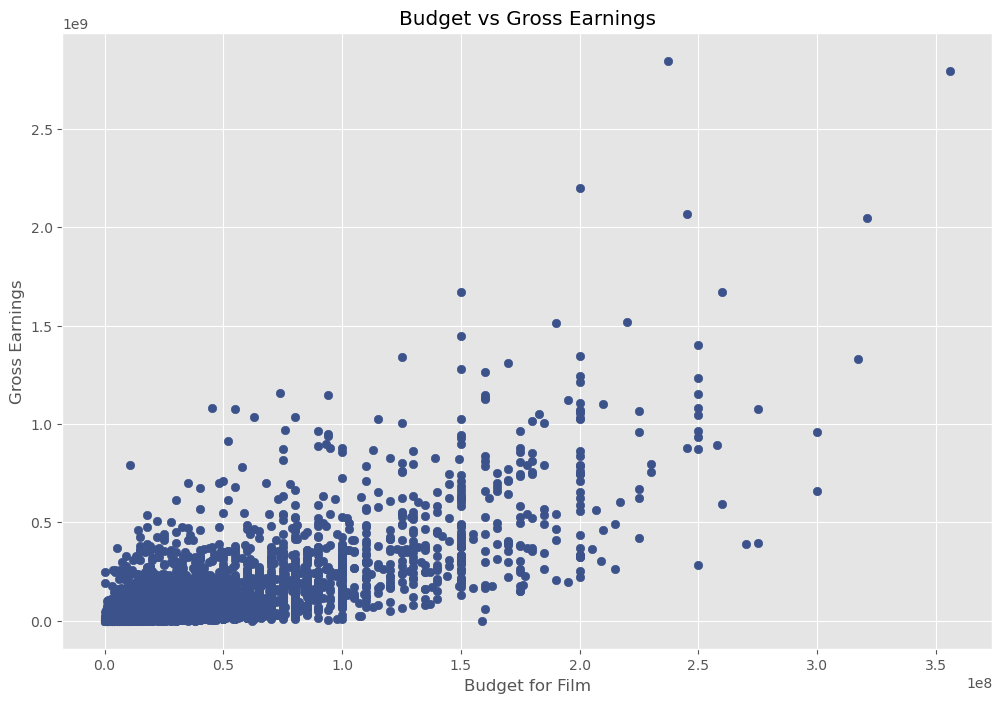

In [28]:
# Create a scatter plot to visualize the relationship between budget and gross earnings of movies
plt.scatter(x=df['budget'], y=df['gross'], color='#3B528B')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

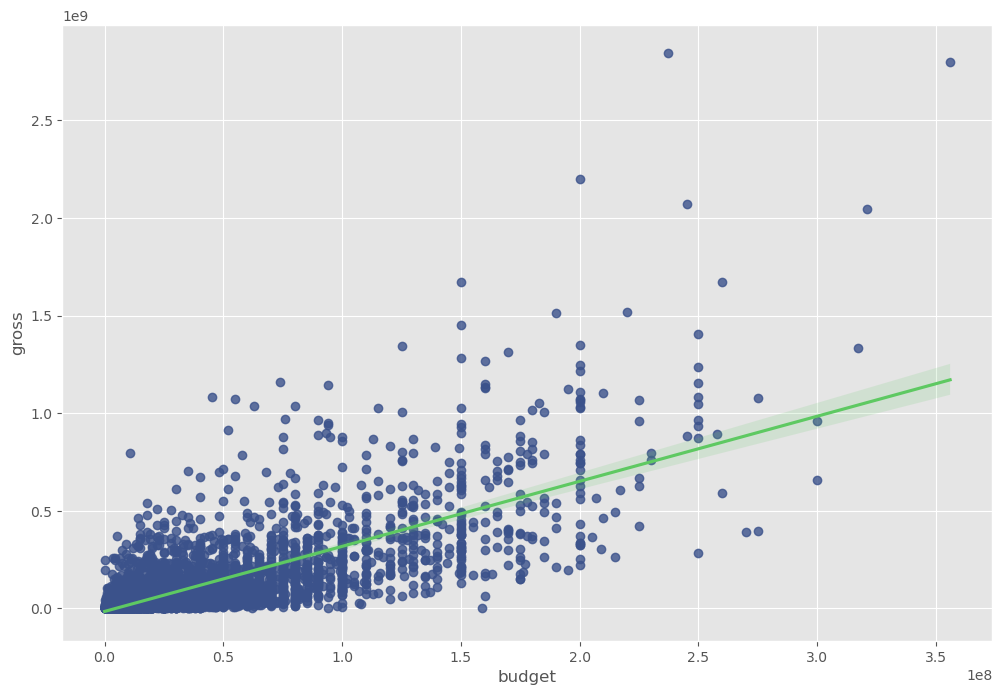

In [27]:
# Using seaborn to plot a regression line on the scatter plot for budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'#3B528B'}, line_kws={'color':'#5EC962'})

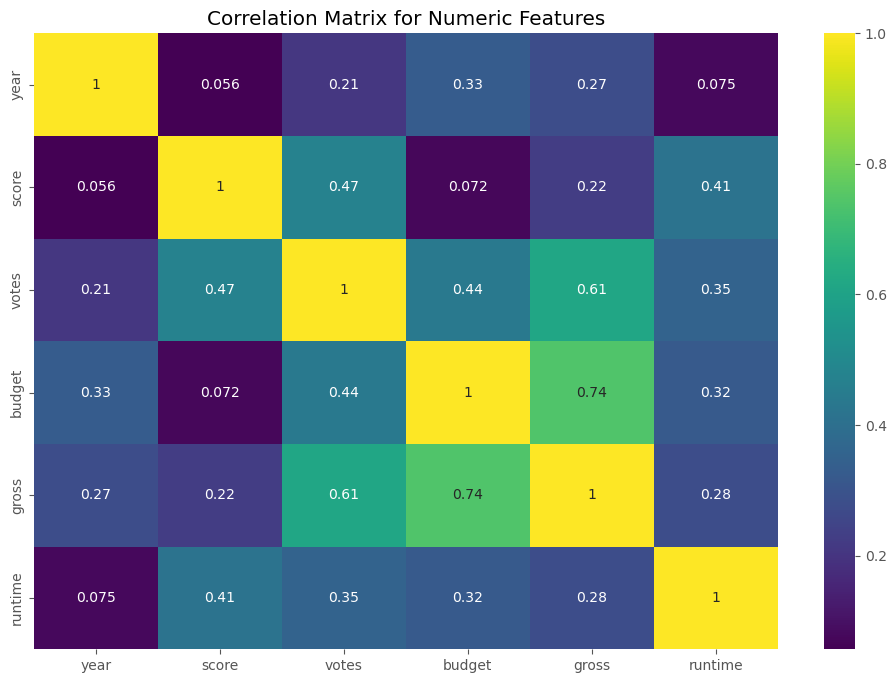

In [12]:
# Compute and display a correlation matrix for numerical features of the dataset
numeric_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [13]:
# Numerize categorical data to prepare for correlation analysis
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

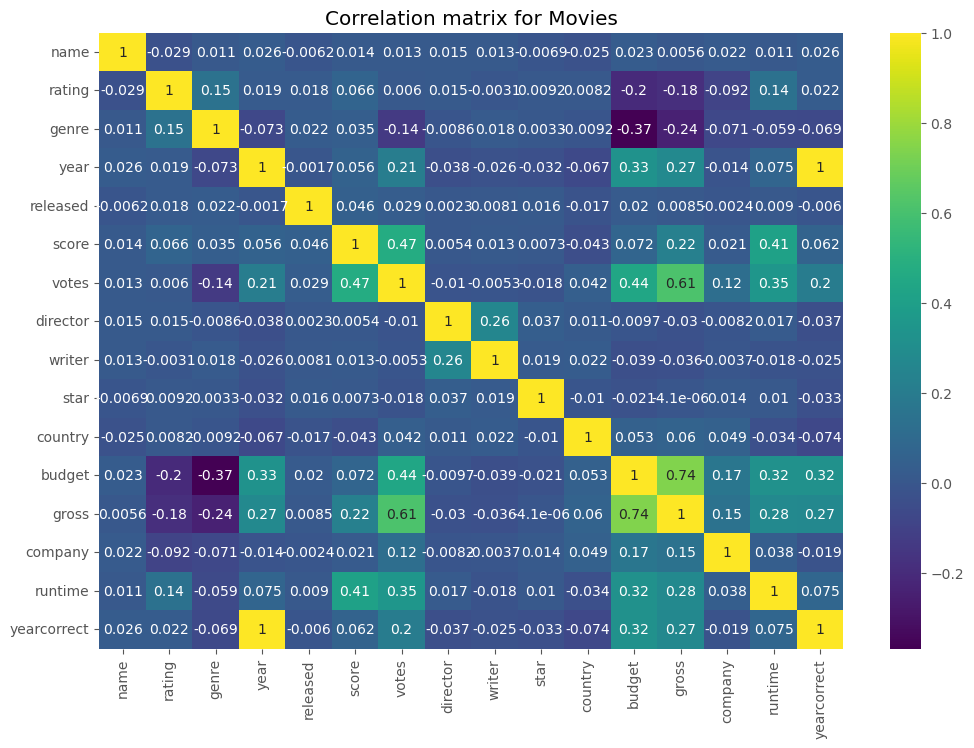

In [14]:
# Display and analyze the correlation matrix for the numerized DataFrame
correlation_mat = df_numerized.corr(method='pearson')
sns.heatmap(correlation_mat, annot=True, cmap='viridis')
plt.title("Correlation matrix for Movies")
plt.show()

In [15]:
# Identify and display highly correlated pairs
corr_pairs = correlation_mat.unstack()
high_corr = corr_pairs[corr_pairs > 0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
             yearcorrect    0.998726
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
             gross          0.614751
director     director       1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          0.740247
gross        votes          0.614751
             budget         0.740247
             gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
yearcorrect  year           0.998726
             yearcorrect    1.000000
dtype: float64

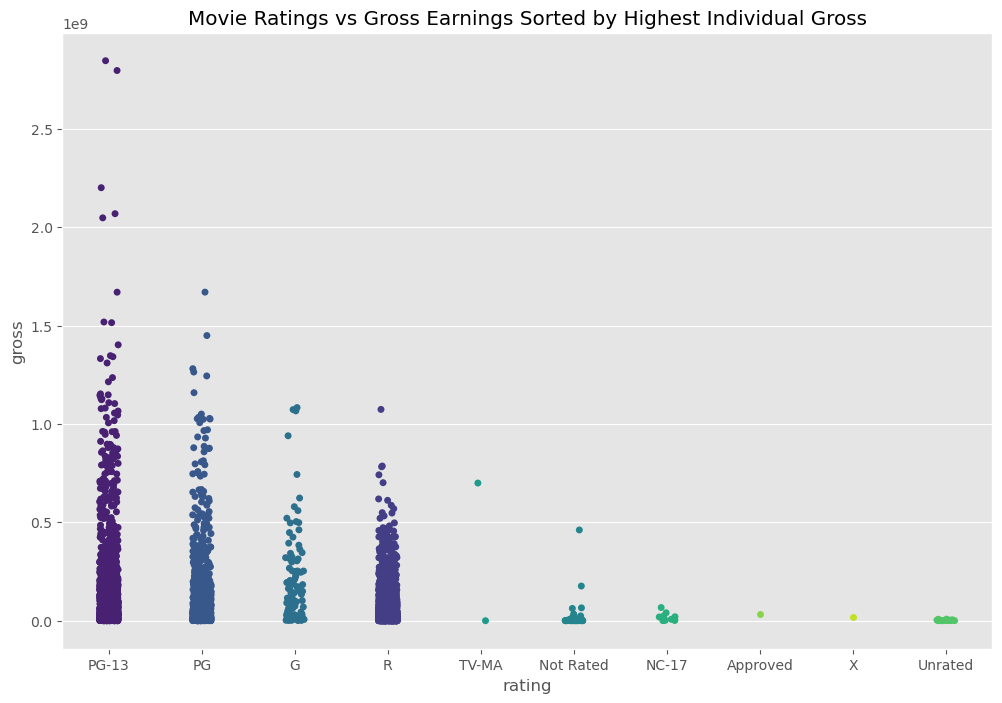

In [25]:
# Calculate and plot maximum gross earnings by movie rating in descending order using a strip plot
max_gross_by_rating = df.groupby('rating', observed=True)['gross'].max()
sorted_ratings = max_gross_by_rating.sort_values(ascending=False).index.tolist()
sns.stripplot(x='rating', y='gross', hue='rating', data=df, order=sorted_ratings, palette='viridis', dodge=False, legend=False)
plt.title('Movie Ratings vs Gross Earnings Sorted by Highest Individual Gross')
plt.show()